C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:15: RuntimeWarning: overflow encountered in matmul
  a = x + A.T @ (y - A @ x)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:15: RuntimeWarning: invalid value encountered in matmul
  a = x + A.T @ (y - A @ x)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:15: RuntimeWarning: invalid value encountered in add
  a = x + A.T @ (y - A @ x)


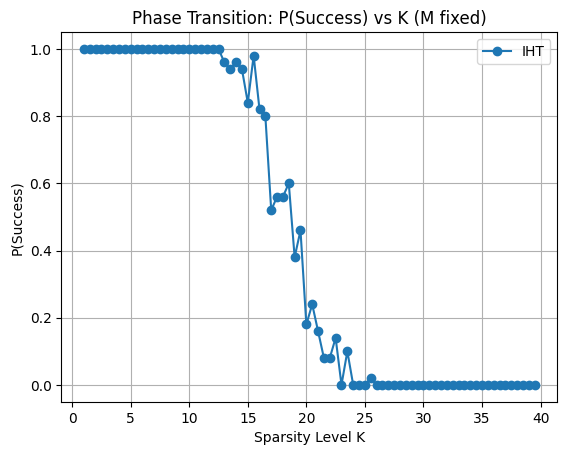

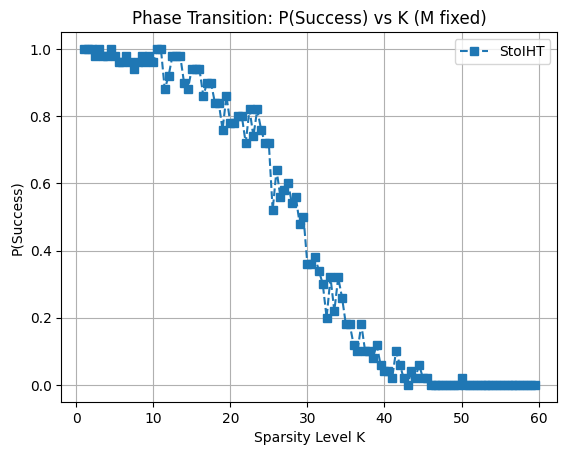

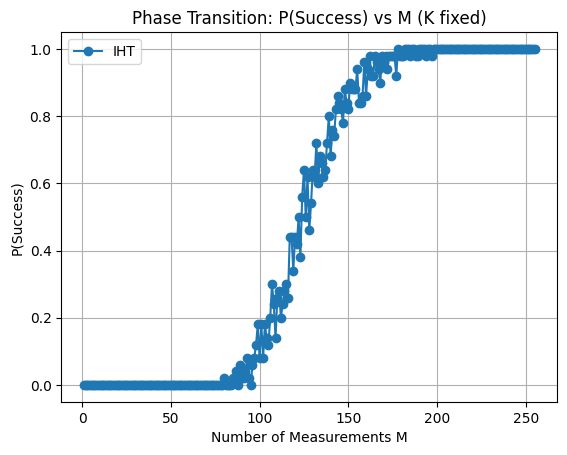

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:29: RuntimeWarning: overflow encountered in matmul
  a = x + A_batch.T @ (y_batch - A_batch @ x)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:29: RuntimeWarning: invalid value encountered in matmul
  a = x + A_batch.T @ (y_batch - A_batch @ x)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16860\2157037819.py:29: RuntimeWarning: invalid value encountered in add
  a = x + A_batch.T @ (y_batch - A_batch @ x)


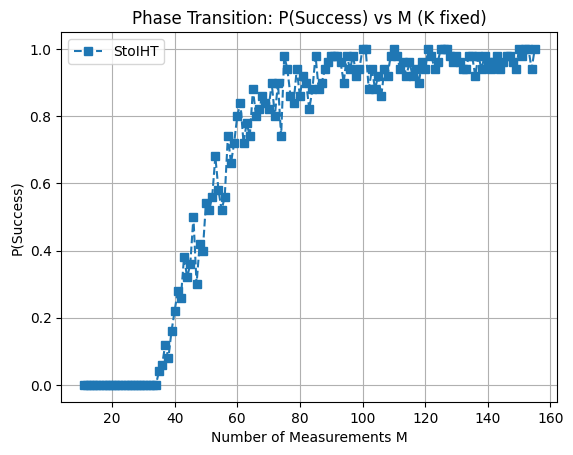

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def hard_thresholding(x, k):
    indices = np.argsort(np.abs(x))[-k:]
    x_thresholded = np.zeros_like(x)
    x_thresholded[indices] = x[indices]
    return x_thresholded

def vanilla_iht(A, y, k, T):
    n = A.shape[1]
    x = np.zeros(n)
    
    for t in range(T):
        a = x + A.T @ (y - A @ x)
        x = hard_thresholding(a, k)
    
    return x

def stochastic_iht(A, y, k, T, batch_size=10):
    n, m = A.shape[1], A.shape[0]
    x = np.zeros(n)
    
    for t in range(T):
        idx = np.random.choice(m, batch_size, replace=False) 
        A_batch = A[idx, :]
        y_batch = y[idx]
        
        a = x + A_batch.T @ (y_batch - A_batch @ x)
        x = hard_thresholding(a, k)
    
    return x

def success_probability(n, m, k, T, num_trials=50, method='IHT'):
    success_count = 0
    
    for _ in range(num_trials):
        A = np.random.randn(m, n) / np.sqrt(m)
        y_true = np.zeros(n)
        nonzero_indices = np.random.choice(n, k, replace=False)
        y_true[nonzero_indices] = np.random.randn(k)
        y = A @ y_true 
        
        if method == 'IHT':
            x_recovered = vanilla_iht(A, y, k, T)
        elif method == 'StoIHT':
            x_recovered = stochastic_iht(A, y, k, T)
        
        recovered_support = np.nonzero(x_recovered)[0]
        true_support = np.sort(nonzero_indices)
        
        if np.array_equal(np.sort(recovered_support), true_support):
            success_count += 1
    
    return success_count / num_trials

def phase_transition_fixed_M():
    n, m, T = 512, 256, 1000 
    k_values = np.arange(1, 40, 0.5) 
    success_probs_iht = [success_probability(n, m, int(k), T, method='IHT') for k in k_values]
    
    plt.figure()
    plt.plot(k_values, success_probs_iht, marker='o', linestyle='-', label='IHT')
    plt.xlabel("Sparsity Level K")
    plt.ylabel("P(Success)")
    plt.title("Phase Transition: P(Success) vs K (M fixed)")
    plt.legend()
    plt.grid()
    plt.show()

def phase_transition_fixed_M_sto():
    n, m, T = 512, 256, 1000 
    k_values = np.arange(1, 60, 0.5) 
    success_probs_stoiht = [success_probability(n, m, int(k), T, method='StoIHT') for k in k_values]
    
    plt.figure()
    plt.plot(k_values, success_probs_stoiht, marker='s', linestyle='--', label='StoIHT')
    plt.xlabel("Sparsity Level K")
    plt.ylabel("P(Success)")
    plt.title("Phase Transition: P(Success) vs K (M fixed)")
    plt.legend()
    plt.grid()
    plt.show()

def phase_transition_fixed_K():
    n, k, T = 512, 8, 1000
    m_values = np.arange(1, 256, 1)
    success_probs_iht = [success_probability(n, m, k, T, method='IHT') for m in m_values]
    
    plt.figure()
    plt.plot(m_values, success_probs_iht, marker='o', linestyle='-', label='IHT')
    plt.xlabel("Number of Measurements M")
    plt.ylabel("P(Success)")
    plt.title("Phase Transition: P(Success) vs M (K fixed)")
    plt.legend()
    plt.grid()
    plt.show()

def phase_transition_fixed_K_sto():
    n, k, T = 512, 8, 1000
    m_values = np.arange(11, 156, 1) # Start from 11 because batch size=10 has to be lesser than m
    success_probs_stoiht = [success_probability(n, m, k, T, method='StoIHT') for m in m_values]
    
    plt.figure()
    plt.plot(m_values, success_probs_stoiht, marker='s', linestyle='--', label='StoIHT')
    plt.xlabel("Number of Measurements M")
    plt.ylabel("P(Success)")
    plt.title("Phase Transition: P(Success) vs M (K fixed)")
    plt.legend()
    plt.grid()
    plt.show()

# Run the experiments
phase_transition_fixed_M()
phase_transition_fixed_M_sto()
phase_transition_fixed_K()
phase_transition_fixed_K_sto()
